In [1]:
import os
os.chdir(r'C:\Users\82107\바탕 화면\Study\ML learning')
print('current directory:', os.getcwd())

current directory: C:\Users\82107\바탕 화면\Study\ML learning


In [3]:
import numpy as np
# 데이터를 읽어오기 위한 pandas 모듈을 불러온다.
import pandas as pd 
# 선형회귀모형을 사용할 수 있는 모듈을 불러온다.
import statsmodels.api as sm
import statsmodels.formula.api as smf

#테이블에서 첫번째 줄이 columns의 이름을 가지고 있는 의미 (index_col = 0)
credit = pd.read_csv('Credit.csv', encoding='cp949', index_col=0)
# 필요한 열만을 추출, 바깥쪽 대괄호는 인덱싱, 안쪽의 대괄호는 리스트형 데이터를 지정하는데 필요한 대괄호
credit = credit[['Gender', 'Balance']]
# 데이터 확인
credit.head()

,Gender,Balance
1,Male,333
2,Female,903
3,Male,580
4,Female,964
5,Male,331


In [4]:
x = np.array(credit['Gender'])
x[:6]

array([' Male', 'Female', ' Male', 'Female', ' Male', ' Male'],
      dtype=object)

In [6]:
#lambda 함수는 항상 if else를 같이 써줘야 함
x_dummy = list(map(lambda x: 1 if x == 'Female' else -1, x))
x_dummy[:6]

[-1, 1, -1, 1, -1, -1]

In [7]:
y = np.array(credit['Balance'])
y[:6]

array([ 333,  903,  580,  964,  331, 1151], dtype=int64)

In [8]:
df = pd.DataFrame({'y':y, 'x_dummy':x_dummy}, columns = ['y', 'x_dummy'])
df.head()

,y,x_dummy
0,333,-1
1,903,1
2,580,-1
3,964,1
4,331,-1


In [9]:
categorical_reg = smf.ols(formula='y ~ x_dummy', data=df).fit()

categorical_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 12 Oct 2023   Prob (F-statistic):              0.669
Time:                        23:22:10   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    519.6697     23.026     22.569      0.000     474.403     564.937
x_dummy        9.8666     23.026      0.429      0.669     -35.400      55.134
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         1.04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
advertising = pd.read_csv('Advertising.csv', encoding='cp949', index_col=0) 

# 필요한 predictor를 선택, numpy 행렬로 변환
x = np.array(advertising[['TV', 'radio']])
x[:6, :]

array([[230.1,  37.8],
       [ 44.5,  39.3],
       [ 17.2,  45.9],
       [151.5,  41.3],
       [180.8,  10.8],
       [  8.7,  48.9]])

In [13]:
inter_x = x[:, 0] * x[:, 1]
inter_x[:6]

array([8697.78, 1748.85,  789.48, 6256.95, 1952.64,  425.43])

In [14]:
y = np.array(advertising['sales'])
y[:6, ]

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2])

In [15]:
df = pd.DataFrame({'sales':y, 'TV':x[:, 0], 'radio':x[:, 1], 'inter':inter_x}, 
                  columns=['sales', 'TV', 'radio', 'inter'])
df.head()

,sales,TV,radio,inter
0,22.1,230.1,37.8,8697.78
1,10.4,44.5,39.3,1748.85
2,9.3,17.2,45.9,789.48
3,18.5,151.5,41.3,6256.95
4,12.9,180.8,10.8,1952.64


In [17]:
# 교호작용을 나타내는 변수가 사용된 회귀모형 적합
inter_reg = smf.ols(formula='sales ~ TV + radio + inter', data=df).fit()
# 적합 결과 확인
inter_reg.summary()

#TV에 대한 효과가 라디오에 의존한다
#inter는 교호작용

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          6.68e-146
Time:                        23:31:11   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
radio          0.0289      0.009      3.241      0.001       0.011       0.046
inter          0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
np.random.seed(1)

#train 데이터
train_x = np.sort(np.random.uniform(-1, 1, 200))[:, np.newaxis] #-1에서 1까지의 uniform 분포에서 200개를 만들어 주고 정렬해줌
#newaxis -> 2차원으로 바꿔줌
train_x.shape

(200, 1)

In [20]:
train_x[:6]

array([[-0.99977125],
       [-0.99425935],
       [-0.97488804],
       [-0.97209685],
       [-0.96835751],
       [-0.96342345]])

In [21]:
train_y = 10*train_x - 10*np.power(train_x, 3) + np.random.normal(0, 1, 200)[:, np.newaxis] # epsilon 항
#10*x - 10*(x^3) + np.normal
train_y[:6]

array([[ 0.0732477 ],
       [ 0.50455394],
       [-0.25098469],
       [ 0.1476288 ],
       [-0.9132459 ],
       [-3.12672286]])

In [22]:
test_x = np.random.uniform(-1, 1, 100)[:, np.newaxis]
test_x[:6]

array([[ 0.90238757],
       [ 0.81080407],
       [ 0.59193388],
       [ 0.83054864],
       [-0.70888354],
       [-0.68453986]])

In [24]:
test_y = 10*test_x - 10*np.power(test_x, 3)
#10*x - 10*(x^3)
test_y[:6]

array([[ 1.67570369],
       [ 2.7777885 ],
       [ 3.84528702],
       [ 2.57627016],
       [-3.5265831 ],
       [-3.63768027]])

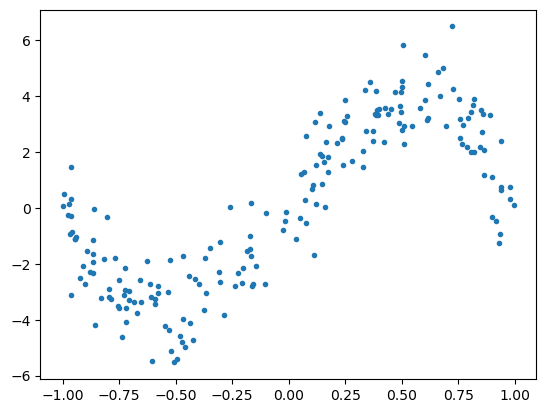

In [25]:
import matplotlib.pyplot as plt
plt.plot(train_x, train_y, linestyle='none', marker='o', markersize=3)
#3차 곡선 (#10*x - 10*(x^3)의 그래프 + error)

In [31]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(train_x, train_y)

KNeighborsRegressor(n_neighbors=3)

In [33]:
predictions = knn.predict(test_x)
predictions[:6]

array([[ 1.37341541],
       [ 3.03813353],
       [ 4.29460272],
       [ 3.20128739],
       [-3.45421098],
       [-3.47171163]])

In [36]:
# test MSE를 계산
mse = (((predictions - test_y) ** 2).sum()) / len(predictions)
mse

0.3010864450154793

In [37]:
# 단순선형회귀의 적합과 MSE 계산
simple_reg = sm.OLS(train_y, train_x).fit()
simple_reg_pred = simple_reg.predict(test_x)
baseline_mse = (((simple_reg_pred - np.squeeze(test_y)) ** 2).sum()) / len(simple_reg_pred)
baseline_mse

2.3949762237417884

In [38]:
mse = []
for k in range(1, 101):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_x, train_y)
    knn_pred = knn.predict(test_x)
    mse.append((((knn_pred - test_y) ** 2).sum()) / len(knn_pred))

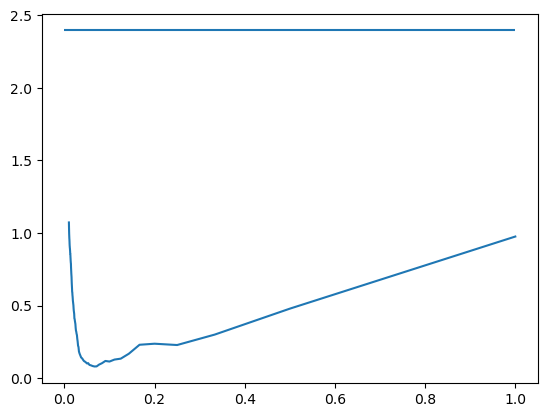

In [39]:
import matplotlib.pyplot as plt
plt.hlines(baseline_mse, 0, 1) #앞에서 계산했던 회귀모형의 mse
plt.plot(1/np.arange(1, 101), mse) #뒤에서 계산한 knn의 mse